# Disney+ Movie Analysis

Disney+ is a subscription based streaming service released in November 2019. For a monthly price, subscribers are able to stream content from Disney, Pixar, Marvel, Disney, Star Wars, and National Geographic. In this notebook I perform data cleaning as well as exploriatory data analysis using 2 datasets in order to analyze movies availiable on Disney+. 

### Datasets 

#### Dataset 1
- Name: movies_df
- Source: https://www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows/code?resource=download
- Description: This dataset contains basic data about Disney+ movies and TV shows including the Disney+ release date, director, cast, duration, rating, etc. 

#### Dataset 2
- Dataset name: revenue_df
- Dataset source: https://www.kaggle.com/datasets/rashikrahmanpritom/disney-movies-19372016-total-gross
- Description: This dataset contains the total gross income for Disney movies released up until 2016. The date of when the total gross income was measure is not clear. 

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
#load in datasets 
movies_df = pd.read_csv('disney_plus_titles.csv')
revenue_df = pd.read_csv('disney_movies_total_gross.csv')

# Data Cleaning

In [139]:
#clean movies_df
#filter to only include movies
movies_df = movies_df[movies_df['type'] == 'Movie']
#keep columns of interest 
movies_df = movies_df[['title', 'director', 'cast']]

In [140]:
#merge datasets together to only include common movie titles 
disney_df = movies_df.merge(revenue_df, how='inner', left_on='title', right_on = 'movie_title')
disney_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 200
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     201 non-null    object
 1   director                  201 non-null    object
 2   cast                      201 non-null    object
 3   movie_title               201 non-null    object
 4   release_date              201 non-null    object
 5   genre                     197 non-null    object
 6   mpaa_rating               177 non-null    object
 7   total_gross               201 non-null    int64 
 8   inflation_adjusted_gross  201 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 15.7+ KB


In [143]:
#change release date to datetime
disney_df['release_date'] = pd.to_datetime(disney_df['release_date']).drop(columns='movie_title')
#change cast column to list 
disney_df['cast'] = disney_df["cast"].str.split(",")
disney_df = disney_df.rename(columns={'total_gross': 'income'})

# EDA

In [144]:
disney_df.head()

,title,director,cast,movie_title,release_date,genre,mpaa_rating,income,inflation_adjusted_gross
0,Ernest Saves Christmas,John Cherry,NaN,Ernest Saves Christmas,1988-11-11,Comedy,PG,28202109,57845202
1,Enchanted,Kevin Lima,NaN,Enchanted,2007-11-21,Romantic Comedy,PG,127706877,156074310
2,"McFarland, USA",Niki Caro,NaN,"McFarland, USA",2015-02-20,Drama,PG,44480275,44480275
3,Maleficent,Robert Stromberg,NaN,Maleficent,2014-05-30,Adventure,PG,241407328,249089809
4,Confessions of a Shopaholic,P.J. Hogan,NaN,Confessions of a Shopaholic,2009-02-13,Romantic Comedy,PG,44277350,49767744


In [145]:
disney_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 200
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   title                     201 non-null    object        
 1   director                  201 non-null    object        
 2   cast                      0 non-null      float64       
 3   movie_title               201 non-null    object        
 4   release_date              201 non-null    datetime64[ns]
 5   genre                     197 non-null    object        
 6   mpaa_rating               177 non-null    object        
 7   income                    201 non-null    int64         
 8   inflation_adjusted_gross  201 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 15.7+ KB


Most variables are categorical or nominal. The only quantitative variable is total gross income. We will used this variable to quantify the success of each movie

In [165]:
#find director that has generated the most revenue
top_rev_directors = disney_df.groupby(by='director')['income'].sum().sort_values(ascending=False)[:10]
top_movie_directors = disney_df.sort_values(by='income', ascending=False)['director'][:10]
top_directors = []
for director in top_rev_directors.index: 
    if director in list(top_movie_directors): 
        top_directors += [director]
print('top director names:', top_directors)
print('number of top directors:', len(top_directors))

top director names: ['Jon Favreau', 'Pete Docter', 'Andrew Stanton', 'Gareth Edwards', 'Andrew Stanton, Angus MacLane', 'Lee Unkrich', 'Chris Buck, Jennifer Lee']
number of top directors: 7


In [166]:
#calculate the max number of movies produced by a single director
disney_df['director'].value_counts()

John Lasseter                5
John Musker, Ron Clements    4
Jon Favreau                  4
Jon Turteltaub               4
James Bobin                  3
                            ..
Chuck Sheetz                 1
Rupert Wainwright            1
Maurice Joyce                1
Henry Selick                 1
Boaz Yakin                   1
Name: director, Length: 155, dtype: int64

Seven of the ten directors/director pairs that generated the highest total gross income across all of their movies were also directors of a top 10 movie in the dataset. The maximum number of movies by a single director in the dataset is five. 

In [168]:
#find genre that generates most revenue
disney_df.groupby(by='genre')['income'].sum().sort_values(ascending=False)

genre
Adventure            11440111884
Comedy                3804865924
Drama                 1497532370
Musical                746441160
Romantic Comedy        395833641
Thriller/Suspense       27569558
Action                  26918576
Documentary             19732496
Western                  8247627
Name: income, dtype: int64

In [170]:
disney_df['genre'].value_counts()

Adventure            88
Comedy               61
Drama                28
Musical               8
Romantic Comedy       5
Documentary           4
Thriller/Suspense     1
Action                1
Western               1
Name: genre, dtype: int64

<AxesSubplot:xlabel='income', ylabel='genre'>

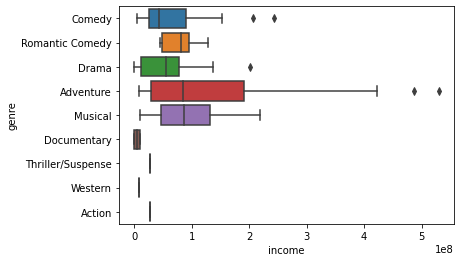

In [169]:
#view the total gross income distributions across each genre 
sns.boxplot(x="income", y="genre", data=disney_df, orient="h")

It appears that the Adventure genre has the most movies as well as the largest spread of incomes having several movies that have generated far more income than any other genre. These outliers make the Adventure genre seem much more succcessful looking at the total income generated, but the mean income is much more in line with other genres. Adventure, Comedy, and Drama have by far many more movies than the other genres. Therefore it does not appear that one genre dominates on average. 

<AxesSubplot:xlabel='release_date'>

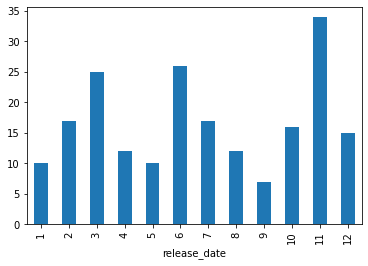

In [82]:
#what month are the most movies released
disney_df.groupby(disney_df['release_date'].dt.month)['title'].count().plot(kind='bar')

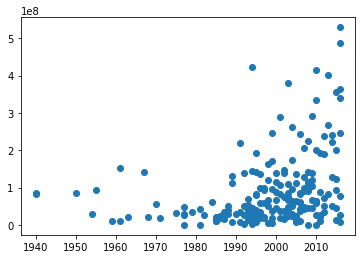

In [93]:
#do more recent movies have higher revenue 
disney_df['year'] = disney_df['release_date'].dt.year
plt.scatter(disney_df['year'], disney_df['total_gross'])

While there are movies produced in every month, March, June, and November produce the most movies. In addition, more recent movies have generated more income than older movies. 